In [1]:
from gensim.models import KeyedVectors
import pickle
import numpy as np
from scipy import spatial

D:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


#### Important Note
The pkl file generated by the code can't just be immediately copy pasted here. Some renaming has to be done to make this notebook work.

For example, the word-vectors for sentiment words and stop words, both are generated by the same piece of code under the name selective_glove_brown_model.pkl. Rename those to selective_glove_brown_model_senti.pkl and selective_glove_brown_model_stop.pkl in respective code runs before pasting here.

In [2]:
path_analogy = "word-test.v1.txt"

In [3]:
with open(
        "glove_brown_model.pkl",
        'rb'
) as f:
    lsa_mat_300, word_to_index = pickle.load(f)
    
lsa_model = KeyedVectors(50)
word_list = [item[0].upper() for item in sorted(word_to_index.items(), key=lambda item: item[1])]
lsa_model.add_vectors(word_list, lsa_mat_300)

In [4]:
with open(
        "selective_glove_brown_model_senti.pkl",
        'rb'
) as f:
    lsa_mat_300, word_to_index = pickle.load(f)
    
lsa_model2 = KeyedVectors(50)
word_list = [item[0].upper() for item in sorted(word_to_index.items(), key=lambda item: item[1])]
lsa_model2.add_vectors(word_list, lsa_mat_300)

In [5]:
with open(
        "selective_glove_brown_model_stop.pkl",
        'rb'
) as f:
    lsa_mat_300, word_to_index = pickle.load(f)
    
lsa_model3 = KeyedVectors(50)
word_list = [item[0].upper() for item in sorted(word_to_index.items(), key=lambda item: item[1])]
lsa_model3.add_vectors(word_list, lsa_mat_300)

In [6]:
result_lsa_score, result_lsa_by_section = lsa_model.evaluate_word_analogies(path_analogy)

result_lsa_score*100

35.123138602520044

In [7]:
result_lsa_score, result_lsa_by_section = lsa_model2.evaluate_word_analogies(path_analogy)

result_lsa_score*100

34.707903780068726

In [8]:
result_lsa_score, result_lsa_by_section = lsa_model3.evaluate_word_analogies(path_analogy)

result_lsa_score*100

35.123138602520044

In [9]:
tw = ['good', 'love', 'bad', 'like', 'sad', 'sorry', 'mean', 'enjoy', 'congratulations', 'happiness', 'worst', 'dog', 'excellent', 'soft', 'praise', 'anger']
senti_words_dist = []
for w in tw:
    senti_words_dist.append(spatial.distance.cosine(lsa_model2.get_vector(w.upper()+'HXABSARCABCD'), lsa_model2.get_vector(w.upper())))
    print(w, senti_words_dist[-1])

good 0.18310749530792236
love 0.27500587701797485
bad 0.34694820642471313
like 0.2209181785583496
sad 0.5025382041931152
sorry 0.2574074864387512
mean 0.1569036841392517
enjoy 0.3361491560935974
congratulations 0.33168894052505493
happiness 0.547216385602951
worst 0.35712742805480957
dog 0.15152591466903687
excellent 0.2340017557144165
soft 0.36033838987350464
praise 0.16370612382888794
anger 0.3334697484970093


In [10]:
tw = ['the', 'i', 'to', 'a', 'and', 'you', 'is', 'of', 'for', 'it', 'in', 'that', 'so', 'this', 'my', 'me']
stop_words_dist = []
for w in tw:
    stop_words_dist.append(spatial.distance.cosine(lsa_model3.get_vector(w.upper()+'HXABSARCABCD'), lsa_model3.get_vector(w.upper())))
    print(w, stop_words_dist[-1])

the 0.15409070253372192
i 0.2116783857345581
to 0.16391384601593018
a 0.1600513458251953
and 0.1900399923324585
you 0.19437092542648315
is 0.17007511854171753
of 0.1481921672821045
for 0.1740872859954834
it 0.1628013253211975
in 0.16055184602737427
that 0.1503218412399292
so 0.267522931098938
this 0.1926884651184082
my 0.3135988116264343
me 0.35281479358673096


In [11]:
lsa_model2.most_similar(positive=['HAPPINESS'])

[('BLESSINGS', 0.7297375202178955),
 ('POSITIVITY', 0.6988093256950378),
 ('JOY', 0.665351390838623),
 ('POSITIVE', 0.6602541208267212),
 ('WISHES', 0.6509174108505249),
 ('CREATIVITY', 0.6494938731193542),
 ('GRATITUDE', 0.6480365991592407),
 ('SUCCESS', 0.6375394463539124),
 ('BLESSING', 0.6363803148269653),
 ('THANKFUL', 0.6360041499137878)]

In [12]:
lsa_model2.most_similar(positive=['HAPPINESSHXABSARCABCD'])

[('MISERY', 0.8019948601722717),
 ('SORROW', 0.7789912223815918),
 ('SADNESS', 0.7452418804168701),
 ('IMAGINATION', 0.7295545935630798),
 ('ENDLESS', 0.728373110294342),
 ('CLARITY', 0.7210588455200195),
 ('OXYGEN', 0.7202736735343933),
 ('PASSION', 0.7200639843940735),
 ('GUILT', 0.7200138568878174),
 ('CONFUSION', 0.7199685573577881)]

In [13]:
lsa_model2.most_similar(positive=['SAD'])

[('FEEL', 0.8744090795516968),
 ('SO', 0.8569358587265015),
 ('MAD', 0.8508458137512207),
 ('IM', 0.8507384657859802),
 ('LIKE', 0.8433355689048767),
 ('REASON', 0.841853141784668),
 ('BAD', 0.8377725481987),
 ('REALLY', 0.8344084620475769),
 ('CRAZY', 0.83233243227005),
 ('DAMN', 0.8322743773460388)]

In [14]:
lsa_model2.most_similar(positive=['SADHXABSARCABCD'])

[('IRONY', 0.7705574035644531),
 ('IGNORANCE', 0.7524101734161377),
 ('LIBERAL', 0.7508460879325867),
 ('SHAMEFUL', 0.7338619232177734),
 ('DISGRACE', 0.7261499762535095),
 ('DENIAL', 0.7249147295951843),
 ('IGNORANT', 0.7209689021110535),
 ('CRUEL', 0.719818651676178),
 ('RACIST', 0.7192907333374023),
 ('UNACCEPTABLE', 0.7146875858306885)]

In [15]:
lsa_model2.most_similar(positive=['GOOD'])

[('GREAT', 0.8925542235374451),
 ('TOO', 0.8882894515991211),
 ('BETTER', 0.8858095407485962),
 ('WELL', 0.8848967552185059),
 ('WAY', 0.881022572517395),
 ('TIME', 0.8805052042007446),
 ('SURE', 0.8764806985855103),
 ('BRO', 0.8751201033592224),
 ('LONG', 0.8744027614593506),
 ('RIGHT', 0.8743685483932495)]

In [16]:
lsa_model2.most_similar(positive=['GOODHXABSARCABCD'])

[('WELL', 0.8759874105453491),
 ('LIKEHXABSARCABCD', 0.8737631440162659),
 ('THOUGH', 0.8683628439903259),
 ('WAY', 0.8649649620056152),
 ('RIGHT', 0.8570808172225952),
 ('TOO', 0.8542194366455078),
 ('HOW', 0.8534142374992371),
 ('ANYWAY', 0.8531290888786316),
 ('WHAT', 0.85244220495224),
 ('BUT', 0.8519994616508484)]

In [17]:
lsa_model2.most_similar(positive=['BAD'])

[('LIKE', 0.8835529088973999),
 ('BUT', 0.8781951665878296),
 ('CUZ', 0.8754231929779053),
 ('CAUSE', 0.875205934047699),
 ('SHIT', 0.8730019927024841),
 ('THINK', 0.8622066378593445),
 ('THOUGH', 0.8585126996040344),
 ('BETTER', 0.8573350310325623),
 ('SAME', 0.8563631176948547),
 ('MAD', 0.8554865121841431)]

In [18]:
lsa_model2.most_similar(positive=['BADHXABSARCABCD'])

[('GOODHXABSARCABCD', 0.8433675169944763),
 ('TASTE', 0.7664076089859009),
 ('THOUGH', 0.7637666463851929),
 ('ESPECIALLY', 0.7607707381248474),
 ('LIKEHXABSARCABCD', 0.7607675194740295),
 ('FOOD', 0.759512186050415),
 ('SOME', 0.7573516368865967),
 ('SOUNDS', 0.745358407497406),
 ('USUAL', 0.7446497082710266),
 ('NASTY', 0.7387652397155762)]

In [19]:
lsa_model2.most_similar(positive=['ANGER'])

[('FRUSTRATION', 0.8091909885406494),
 ('SANITY', 0.7734940648078918),
 ('EMPATHY', 0.7635815143585205),
 ('ENTHUSIASM', 0.7569218873977661),
 ('FUELS', 0.7551988363265991),
 ('DESPERATION', 0.7506676316261292),
 ('FLOWS', 0.7492239475250244),
 ('CONFUSION', 0.7469990253448486),
 ('EGO', 0.7465503811836243),
 ('LACKING', 0.7452354431152344)]

In [20]:
lsa_model2.most_similar(positive=['ANGERHXABSARCABCD'])

[('COMMUNICATION', 0.7745062708854675),
 ('EMPATHY', 0.7644457817077637),
 ('INTERNAL', 0.7379111647605896),
 ('CONFUSION', 0.7244014739990234),
 ('FRUSTRATION', 0.7184684872627258),
 ('CONSTANT', 0.714521050453186),
 ('CAPABILITY', 0.7139039635658264),
 ('COMPASSION', 0.7072450518608093),
 ('CRITICAL', 0.7064573168754578),
 ('CREATES', 0.7061949968338013)]

In [21]:
lsa_model2.most_similar(positive=['CONGRATULATIONS'])

[('CONGRATS', 0.8245017528533936),
 ('LUCK', 0.731797993183136),
 ('WELCOME', 0.7139872908592224),
 ('GOODLUCK', 0.7074651122093201),
 ('CHEERS', 0.706563413143158),
 ('THANKYOU', 0.7017965912818909),
 ('THANKS', 0.6994798183441162),
 ('INCREDIBLE', 0.6968775987625122),
 ('FANTASTIC', 0.6960525512695312),
 ('ADVANCE', 0.6933184862136841)]

In [22]:
lsa_model2.most_similar(positive=['CONGRATULATIONSHXABSARCABCD'])

[('EXCELLENTHXABSARCABCD', 0.7153873443603516),
 ('ADVANCE', 0.6835443377494812),
 ('CONGRATS', 0.6790058612823486),
 ('GLOBE', 0.6733391284942627),
 ('CONGRATULATIONS', 0.6683109998703003),
 ('AUSTIN', 0.6653510332107544),
 ('ARTIST', 0.6607610583305359),
 ('MARS', 0.6558084487915039),
 ('CANADIAN', 0.6541292667388916),
 ('HOST', 0.6495987772941589)]

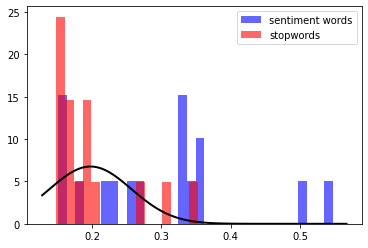

In [23]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Generate some data for this
# demonstration.
data = np.array(stop_words_dist)

# Fit a normal distribution to
# the data:
# mean and standard deviation
mu, std = norm.fit(data)

x2_data = np.array(senti_words_dist)

fix, ax = plt.subplots()
# Plot the histogram.
ax.hist(x2_data, bins=32, density=True, alpha=0.6, color='b', label='sentiment words')
ax.hist(data, bins=16, density=True, alpha=0.6, color='r', label='stopwords')
ax.legend()

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
#title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
#plt.title(title)

plt.show()